In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

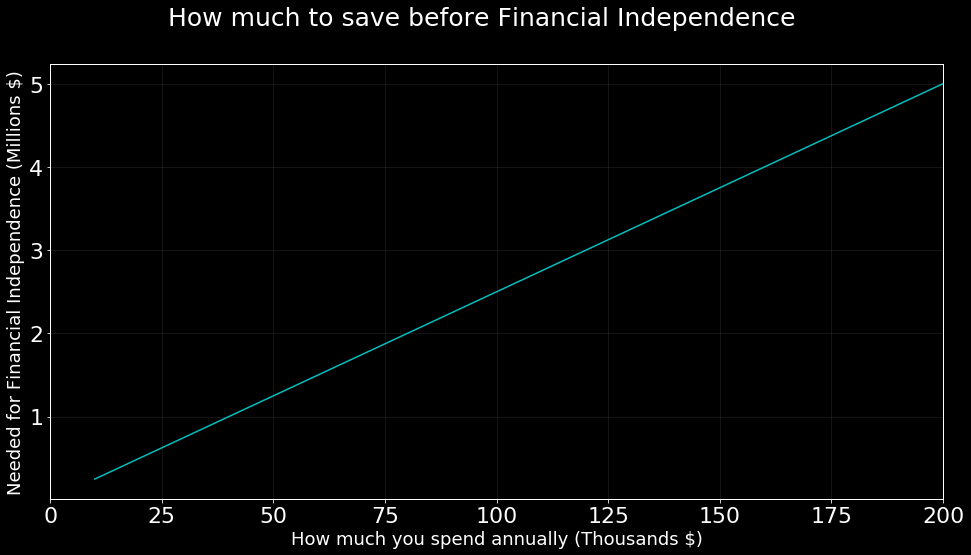

In [44]:
upper_lim = 200
plt.figure(figsize=(16,8))
spending = np.linspace(10,upper_lim,100)
nestegg  = spending * 25 / 1000
plt.plot(spending,nestegg,c='c')
plt.grid(alpha=0.1); plt.ylabel('Needed for Financial Independence (Millions $)',fontsize=18)
plt.xlabel('How much you spend annually (Thousands $)',fontsize=18)
matplotlib.rcParams.update({'font.size': 22})
plt.xlim(0,upper_lim); plt.suptitle('How much to save before Financial Independence',fontsize=25)
plt.show()

SO the theory is:
- after taxes, you take your take home
- split it based on what you save and assume the rest gets spent

income [$1000s],50,100,200
p_save,,,
20.0,100.000000,100.000000,100.000000
25.0,75.000000,75.000000,75.000000
30.0,58.333333,58.333333,58.333333
35.0,46.428571,46.428571,46.428571
40.0,37.500000,37.500000,37.500000


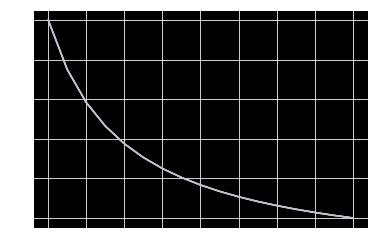

In [28]:
incomes = np.array([50,100,200])
p_save = np.linspace(0.2,1,17)
times = {}
comptimes = {}

for income in incomes:
    # how much you save and spend
    annual_save  = income * p_save
    annual_spend = income - annual_save
    # need this to retire
    target = 25 * annual_spend
    # how long to acquire that
    t_retire = target / annual_save
    times[income] = t_retire
    # t_retire_compounding = 
    plt.plot(p_save * 100, t_retire)

times = pd.DataFrame(times, index = p_save * 100)
times.index.name = 'p_save'
times.columns.name = 'income [$1000s]'
times.head()

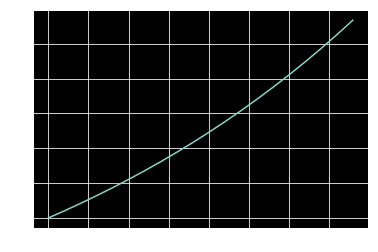

In [32]:
n = 12
P = 100
r = 0.04
t = np.arange(0,20)

A = P * (1 + r/n)**(n*t) 
plt.plot(t,A)

In [40]:
np.log(np.e)

1.0

In [67]:
incomes = np.array([50,100,200])
p_save = 0.6
annual_saved = income * p_save

annual_spent = income - annual_saved
FV = 25 * annual_spent
r_annual = 0.04

month_saved  = annual_saved / 12
r_month = r /12

def calc_comp_time(A,r,FV): return np.log(1 + (FV * r)/A) / np.log(1 + r)

yr_approx = FV / annual_saved
years  = calc_comp_time(annual_saved, r_annual, FV)
months = calc_comp_time(month_saved, r_month,  FV)
yr_approx, months/12, years

(16.666666666666668, 12.791913190138779, 13.02438387006365)

Rearranging the Annuity Formula

FV = A [ ((1+r)^n - 1) / r]
- A = Periodic Payment
- r = Rate per period (effective rate)
- n = number of periods

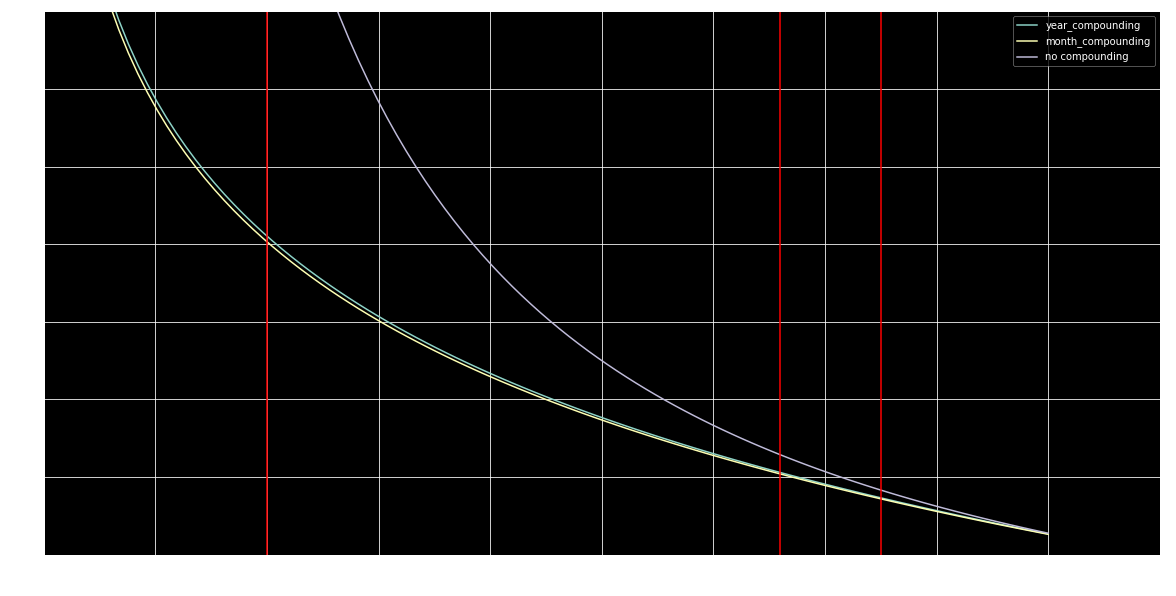

In [100]:
incomes = np.array([50])
p_save = np.linspace(0.05,0.9,100)

r_annual = 0.04
r_month = r /12

for income in incomes:
    # how much you save per year or month
    annual_saved = income * p_save
    month_saved  = annual_saved / 12
    # how much you have to save based on how much you spend
    annual_spent = income - annual_saved
    FV = 25 * annual_spent
    # 3 approximations
    no_comp = FV / annual_saved
    years  = calc_comp_time(annual_saved, r_annual, FV)
    months = calc_comp_time(month_saved, r_month,  FV) / 12
    # plot them all
    plt.figure(figsize=(20,10))
    plt.plot(p_save*100, years); plt.plot(p_save*100, months); plt.plot(p_save*100, no_comp)
    plt.ylim([0,70]); plt.xlim([0,100]); plt.xticks(np.arange(11)*10)
    plt.ylabel('Years til Financial Freedom'); plt.xlabel('Percent of Paycheck Saved')
    plt.legend(['year_compounding','month_compounding','no compounding'])
    for vline in [20,66,75]: plt.axvline(vline,c='r')
# yr_approx, months/12, years

My numbers

In [112]:
income = 120
spending = 35
save_percent = (income * 0.7 - spending) / (income * 0.7)
save_percent

0.5833333333333334

## How long do I have to retire?

Well, we've got the first step. We have calculated how much we need to retire based on our "tastes" in lifestyle.  However, most people care about how long do they have to work 

## The true cost of buying something

So that's it. If you can determine what your standard of living is, you can determine how much money you could retire on if you put all your savings into the SP500 and just milked that as your retirement plan.  But the key is calculating how much you spend.  Notice in the plot above that if you spend \\$50,000 a year that you could retire after you had just over a million dollars.  However, if you insist on living at $200,000 a year, you would need to acquire 4x that amount. It's just simple math, 



However, it's actually not as simple as working 4 times as long.  Because you're actually 

## But... I like {insert expensive thing}

That's totally fine. If you can't find a sufficient substitute etc... MMM has a great argument for this...

It's about being happy... not about keeping up. If you need that thing and there is absolutely nothing else that fu7lfills that need in your life. Then you know where you draw your line.

